In [2]:
import pandas as pd
import numpy as np

import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\academic\imarticus\content\assessments\20220523 imarticus assessment assessment python linear regression\Fish_dataset.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:xlabel='Species', ylabel='count'>

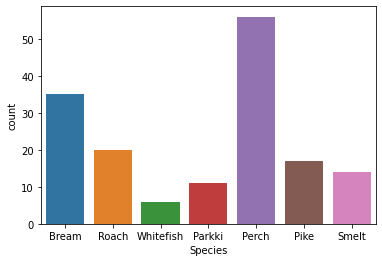

In [4]:
sns.countplot(x='Species', data=df)

In [5]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [6]:
df=df.drop(['Species'],axis=1)
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


<AxesSubplot:>

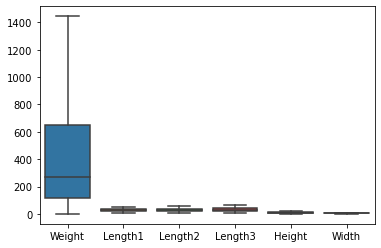

In [12]:
#find out outliers
sns.boxplot(data=df)

In [11]:
#removing outliers

def remove_outliers(df):
    for i in df.columns:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((df[i].dtype=='float64') |  (df[i].dtype=='int64')):
            df[i][df[i]>=upper_limit]=upper_limit
            df[i][df[i]<=lower_limit]=lower_limit
        else:
            df[i]=df[i]
    return df

remove_outliers(df)      

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:>

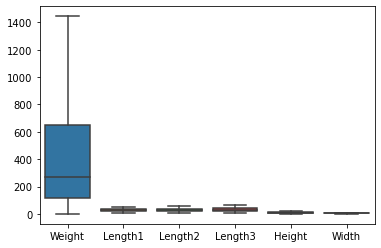

In [13]:
sns.boxplot(data=df)

In [15]:
# Checking for Missing values
df.isna().sum()

Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:xlabel='Weight', ylabel='Count'>

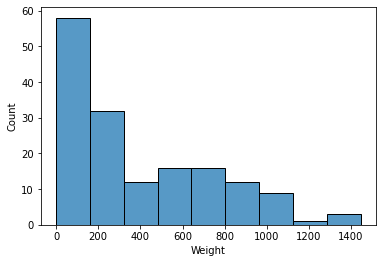

In [16]:
# Checking whether the data is normal or not
sns.histplot(x='Weight',data=df)

 Weight is positive squewed

In [17]:
# Applying sqrt transformation for making data normal

df['Weight']=df['Weight']**(1/2)
df

,Weight,Length1,Length2,Length3,Height,Width
0,15.556349,23.2,25.4,30.0,11.5200,4.0200
1,17.029386,24.0,26.3,31.2,12.4800,4.3056
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
3,19.052559,26.3,29.0,33.5,12.7300,4.4555
4,20.736441,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,3.492850,11.5,12.2,13.4,2.0904,1.3936
155,3.660601,11.7,12.4,13.5,2.4300,1.2690
156,3.492850,12.1,13.0,13.8,2.2770,1.2558
157,4.438468,13.2,14.3,15.2,2.8728,2.0672


<AxesSubplot:xlabel='Weight', ylabel='Count'>

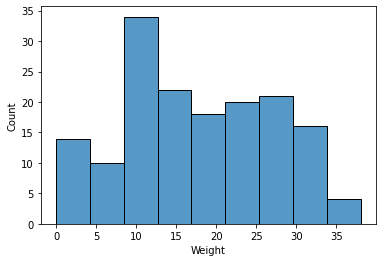

In [18]:
sns.histplot(x='Weight',data=df)

Now the data is normal.

In [19]:
# data partition
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [20]:
x=df.drop(['Weight'],axis=1)
y=df['Weight']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,random_state=112)

In [21]:
# train dataset

new=pd.concat([y_train,x_train],axis=1)
new

,Weight,Length1,Length2,Length3,Height,Width
83,10.723805,19.0,21.0,22.5,5.9175,3.3075
67,13.038405,19.0,20.7,23.2,9.3960,3.4104
93,12.041595,20.7,22.7,24.2,5.9532,3.6300
2,18.439089,23.9,26.5,31.1,12.3778,4.6961
112,26.172505,34.0,36.5,39.0,10.8810,6.8640
...,...,...,...,...,...,...
48,13.000000,22.0,24.0,27.2,7.5344,3.8352
148,3.114482,10.4,11.0,12.0,2.1960,1.3800
40,0.000000,19.0,20.5,22.8,6.4752,3.3516
65,12.247449,18.4,20.0,22.4,8.8928,3.2928


In [23]:
# Finding Correlation, Collinearity and Multi-collinearity

new.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.942005,0.946628,0.953673,0.810344,0.946874
Length1,0.942005,1.000000,0.999533,0.992553,0.646916,0.876996
Length2,0.946628,0.999533,1.000000,0.994459,0.660392,0.882220
Length3,0.953673,0.992553,0.994459,1.000000,0.709743,0.877394
Height,0.810344,0.646916,0.660392,0.709743,1.000000,0.790609
Width,0.946874,0.876996,0.882220,0.877394,0.790609,1.000000


<AxesSubplot:>

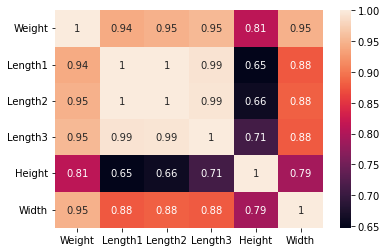

In [24]:
sns.heatmap(new.corr(),annot=True)

There is correlation of Weight with all the independent variables. Also multi-collinearity exists.

In [ ]:
new.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

# Model building

* H0: There is no linear relationship between Weight and Length1, Length2, Length3, Height, Width.
* Vs
* H1: There is linear relationship between Weight and Length1, Length2, Length3, Height, Width.
    
* alpha=0.05 (5%)   

In [25]:
import statsmodels.formula.api as smf
model=smf.ols('Weight ~ Length1+Length2+Length3+Height+Width',data=new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     682.2
Date:                Tue, 31 May 2022   Prob (F-statistic):           2.50e-78
Time:                        09:28:52   Log-Likelihood:                -211.68
No. Observations:                 111   AIC:                             435.4
Df Residuals:                     105   BIC:                             451.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9319      0.458    -15.137      0.000      -7.840      -6.024
Length1        0.2585      0.629      0.411      0.682      -0.988       1.505
Length2        0.0226      0.678      0.033      0.973      -1.321       1.366
Length3        0.1753      0.226      0.774      0.441      -0.274       0.624
Height         0.4183      0.111      3.785      0.000       0.199       0.637
Width          1.8110      0.324      5.589      0.000       1.169       2.453
==============================================================================
Omnibus:                      101.600   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1781.677
Skew:                          -2.806   Prob(JB):                         0.00
Kurtosis:                      21.808   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x1=new.drop(['Weight','Length2','Length3','Width'],axis=1)
series_before=pd.Series([variance_inflation_factor(x1.values,i)
                       for i in range (x1.shape[1])],
                       index=x1.columns)
series_before

Length1    8.556457
Height     8.556457
dtype: float64

# Assumptions of Model

* Linearity
* Homoscedasticity
* Normality
* Model error has to be Independently Identically Distributed.


<AxesSubplot:xlabel='Length1', ylabel='Weight'>

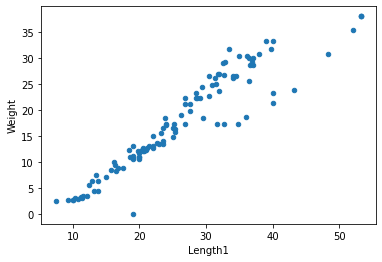

In [27]:
new.plot.scatter(x='Length1',y='Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

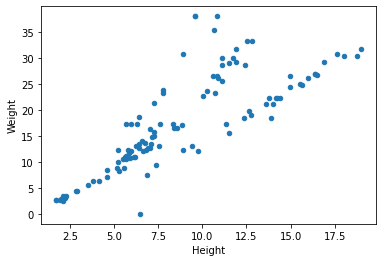

In [28]:
new.plot.scatter(x='Height',y='Weight')

In [29]:
# Homoscedasticity

new['fitted_values']=model.fittedvalues
new['residual']=model.resid
new.head()

,Weight,Length1,Length2,Length3,Height,Width,fitted_values,residual
83,10.723805,19.0,21.0,22.5,5.9175,3.3075,10.864185,-0.140379
67,13.038405,19.0,20.7,23.2,9.3960,3.4104,12.621624,0.416781
93,12.041595,20.7,22.7,24.2,5.9532,3.6300,12.239080,-0.197485
2,18.439089,23.9,26.5,31.1,12.3778,4.6961,18.980137,-0.541048
112,26.172505,34.0,36.5,39.0,10.8810,6.8640,26.501925,-0.329420


<AxesSubplot:xlabel='fitted_values', ylabel='residual'>

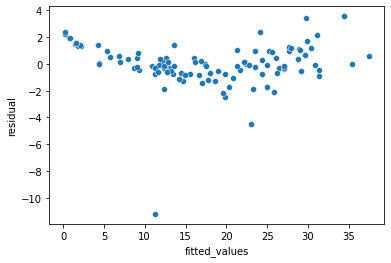

In [30]:
sns.scatterplot(x='fitted_values',y='residual',data=new)

c:\applications\professional\anaconda\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


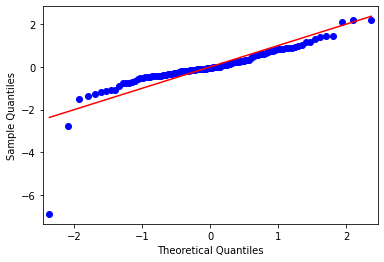

In [31]:
import statsmodels.api as sm
fig=sm.qqplot(new.residual, fit=True, line='s')
plt.show()

<AxesSubplot:ylabel='Frequency'>

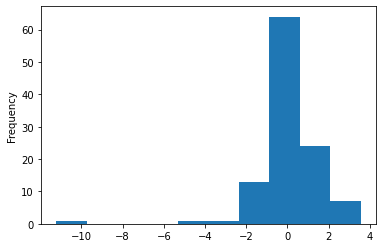

In [32]:
# Model error has to be IID

new['residual'].plot.hist()

In [33]:
# Prediction on Test data

test=pd.concat([x_test,y_test],axis=1)
test.head(10)

,Length1,Length2,Length3,Height,Width,Weight
152,11.3,11.8,13.1,2.2139,1.1659,3.146427
33,37.4,41.0,45.9,18.6354,6.7473,31.224990
62,14.3,15.5,17.4,6.5772,2.3142,7.745967
155,11.7,12.4,13.5,2.4300,1.2690,3.660601
15,29.4,32.0,37.2,15.4380,5.5800,24.494897
106,25.9,28.0,29.4,7.8204,4.2042,15.811388
20,31.3,34.0,39.5,15.1285,5.5695,23.979158
97,22.0,24.0,25.5,6.3750,3.8250,12.041595
149,10.7,11.2,12.4,2.0832,1.2772,3.130495
4,26.5,29.0,34.0,12.4440,5.1340,20.736441


In [34]:
test['prediction']=model.predict(test)
test

,Length1,Length2,Length3,Height,Width,Weight,prediction
152,11.3,11.8,13.1,2.2139,1.1659,3.146427,1.590081
33,37.4,41.0,45.9,18.6354,6.7473,31.224990,31.724739
62,14.3,15.5,17.4,6.5772,2.3142,7.745967,7.107913
155,11.7,12.4,13.5,2.4300,1.2690,3.660601,2.054281
15,29.4,32.0,37.2,15.4380,5.5800,24.494897,24.476535
106,25.9,28.0,29.4,7.8204,4.2042,15.811388,16.435692
20,31.3,34.0,39.5,15.1285,5.5695,23.979158,25.267635
97,22.0,24.0,25.5,6.3750,3.8250,12.041595,13.362019
149,10.7,11.2,12.4,2.0832,1.2772,3.130495,1.445586
4,26.5,29.0,34.0,12.4440,5.1340,20.736441,21.037895


In [35]:
y=-6.4103+0.6643*26.5+0.7519*12.4440
y

20.550293600000003

In [36]:
from sklearn.metrics import mean_squared_error

model_mse=mean_squared_error(new.Weight, new.fitted_values)
model_rmse=np.sqrt(model_mse)
model_rmse

1.6292112868037285

In [37]:
from sklearn.metrics import mean_squared_error

test_mse=mean_squared_error(test.Weight, test.prediction)
test_rmse=np.sqrt(test_mse)
test_rmse


1.1358039943928768

In [38]:
# Original Weight and prediction Test data
test['Weight']=test['Weight']**2
test['prediction']=test['prediction']**2
test

,Length1,Length2,Length3,Height,Width,Weight,prediction
152,11.3,11.8,13.1,2.2139,1.1659,9.9,2.528358
33,37.4,41.0,45.9,18.6354,6.7473,975.0,1006.459036
62,14.3,15.5,17.4,6.5772,2.3142,60.0,50.522433
155,11.7,12.4,13.5,2.4300,1.2690,13.4,4.220070
15,29.4,32.0,37.2,15.4380,5.5800,600.0,599.100779
106,25.9,28.0,29.4,7.8204,4.2042,250.0,270.131983
20,31.3,34.0,39.5,15.1285,5.5695,575.0,638.453386
97,22.0,24.0,25.5,6.3750,3.8250,145.0,178.543556
149,10.7,11.2,12.4,2.0832,1.2772,9.8,2.089718
4,26.5,29.0,34.0,12.4440,5.1340,430.0,442.593028


* Weight of fish species is mainly affected by Length1 and Height
* 95.7% is the accuracy of model, so we can say the model is good fit.
* y=-6.4103+0.6643*Length1+0.7519*Height